In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
print(X_train[0].shape)

(28, 28)


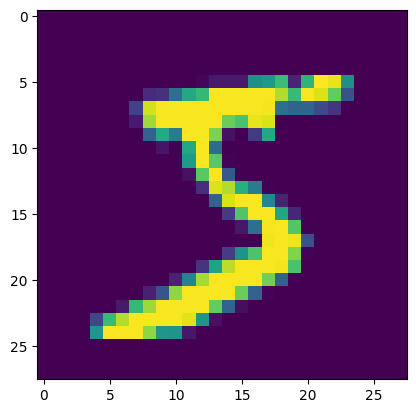

In [8]:
plt.imshow(X_train[0])
plt.show()

In [9]:
print(Y_train[0])

5


In [10]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [11]:
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),


])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8618 - loss: 0.4855
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9553 - loss: 0.1475
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9685 - loss: 0.1058
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0818
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0655
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0544
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0456
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9873 - loss: 0.0413
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9901 - loss: 0.0335
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0294


In [17]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1174
0.9718000292778015


In [18]:
print(X_test.shape)

(10000, 28, 28)


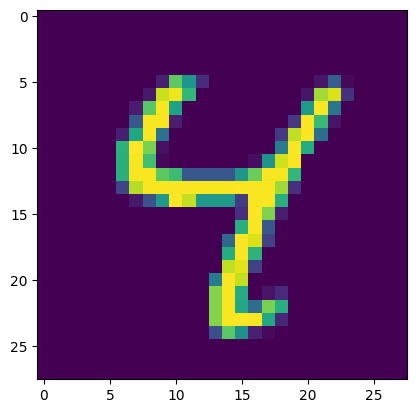

In [19]:
plt.imshow(X_test[6])
plt.show()

In [20]:
print(Y_test[6])


4


In [21]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
y_pred.shape

(10000, 10)

In [23]:
y_pred[6]

array([5.2506992e-11, 2.4890420e-10, 2.4753953e-12, 6.5264643e-08,
       9.9962211e-01, 1.9799188e-07, 3.0294864e-10, 3.1120496e-07,
       3.0708825e-04, 7.0114140e-05], dtype=float32)

In [24]:
label=np.argmax(y_pred[6])
print(label)

4


In [25]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [26]:
confusion_matrix=confusion_matrix(Y_test,y_pred_labels)
print(confusion_matrix)

tf.Tensor(
[[ 964    0    0    2    5    2    1    0    2    4]
 [   1 1120    1    3    0    1    3    0    5    1]
 [   4    3  990    9    4    0    3    5   14    0]
 [   0    0    4  983    0    7    0    3    9    4]
 [   1    0    0    1  962    1    5    3    2    7]
 [   1    0    1    5    3  866    3    3    8    2]
 [   3    3    1    1    7    7  929    1    6    0]
 [   1    3    8    3    1    0    0  983    9   20]
 [   1    0    2    9    3    2    1    0  952    4]
 [   1    1    0    5   16    9    0    3    5  969]], shape=(10, 10), dtype=int32)


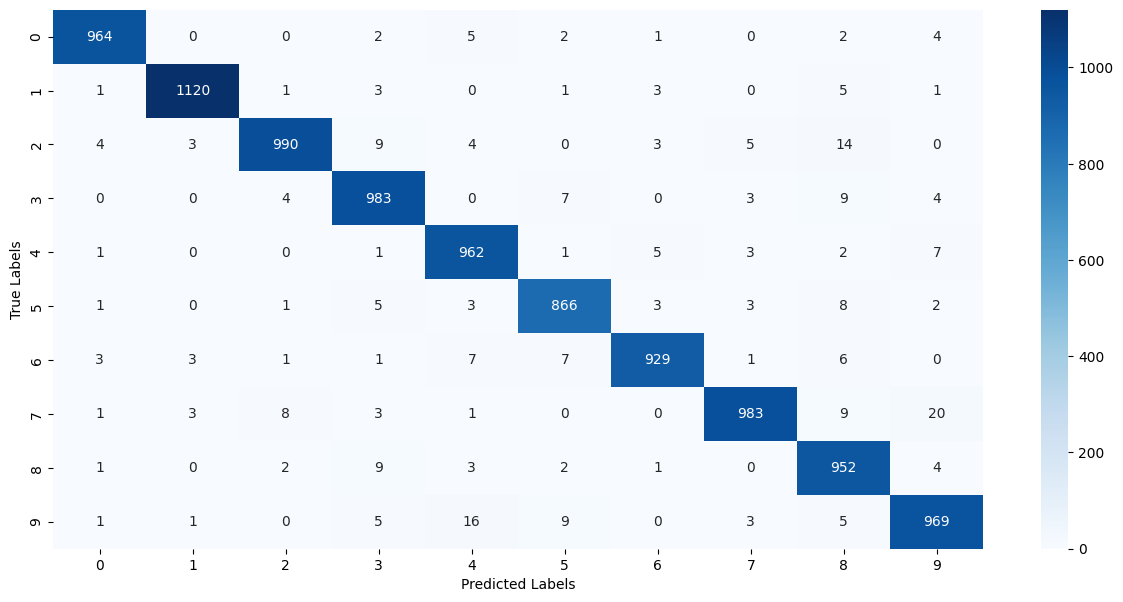

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [66]:
import cv2

input_image_path = "/content/3.png"
input_image = cv2.imread(input_image_path)
type(input_image)


numpy.ndarray

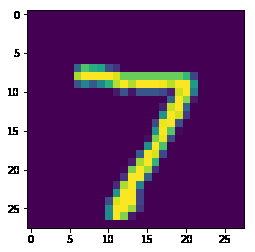

In [67]:
import cv2
from google.colab.patches import cv2_imshow

input_image_path = "/content/3.png"
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Image not found or unable to read.")
else:
    cv2_imshow(input_image)


In [68]:
input_image.shape

(252, 255, 3)

In [69]:
gray_image=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

In [70]:
gray_image.shape

(252, 255)

In [71]:
input_image_resized=cv2.resize(gray_image,(28,28))

In [72]:
input_image_resized.shape

(28, 28)

In [73]:
cv2_imshow(input_image_resized)

In [74]:
input_image_resized=input_image_resized/255

In [75]:
import numpy as np
image_reshaped=np.reshape(input_image_resized,[1,28,28])

In [76]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[4.0637655e-44 3.3771431e-29 5.2672543e-25 7.0825908e-11 0.0000000e+00
  2.0768364e-40 0.0000000e+00 1.0000000e+00 1.1837678e-35 8.0208466e-20]]


In [77]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

7
